## Tilting Point Data Test (Part 2)
- You are free to use any package that you deem necessary, the basic pacakge is already imported
- After each question, there will be an answer area, you can add as many cells as you deem necessary between answer and following question
- The accuracy is less important, the path to get there is what's important

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Question: Data Analysis and Machine Learning

Attached is a Game of War type game, given the data, please build a model to predict players' LTV
1. What kind of exploratory analysis would you want to conduct?
2. What procedure would you take to build the model?
3. How would you validate the result?
4. Please choose one model, and perform from step 1 to step 3 in order
5. How would you productionalize it?

In [2]:
df = pd.read_csv(os.path.join('data', 'ltv_data.csv'))
df.head()

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
0,213.0,40234.0,4.0,8.0,1877045.0,0.0,NaN,NaN,NaN,NaN,49.5,NaN,NaN,120.0
1,26.0,10384.0,3.0,5.0,292869.0,0.0,NaN,NaN,NaN,NaN,577.5,NaN,NaN,15.0
2,1.0,176.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN
3,2.0,181.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN
4,1.0,135.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,67.5,NaN,NaN,NaN


##### Answer below

### 1. What kind of exploratory analysis would you want to conduct?

I would like to conduct CRISP-DM approach for exploratory analysis of given data.

The CRISP-DM Process (Cross Industry Process for Data Mining). It mainly consists of the following parts:

* Business Understanding
* Data Understanding
* Prepare Data
* Data Modeling
* Evaluate the Results
* Deploy


In [3]:
df.describe()

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
count,194092.000000,194092.000000,194092.000000,194092.000000,1.940920e+05,194092.000000,185056.000000,185056.000000,185056.000000,185056.000000,1.048575e+06,2517.000000,2882.000000,3196.000000
mean,5.635482,5494.401794,1.299070,1.488438,1.896333e+06,125.341276,0.478914,2.072729,0.493559,18.432923,9.151752e+01,29.075089,49.454545,128.054443
std,17.374128,24499.362161,0.853919,2.284216,1.853906e+07,946.886849,8.831115,27.111509,8.907912,98.584136,8.588002e+02,69.339642,144.926618,532.415173
min,1.000000,0.000000,-7.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,127.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.000000,5.000000,5.000000
50%,1.000000,454.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,10.000000,10.000000,13.000000
75%,3.000000,1832.000000,1.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,20.000000,35.000000,53.000000
max,519.000000,585638.000000,10.000000,21.000000,1.011674e+09,77216.000000,2005.000000,3883.000000,1810.000000,3492.000000,1.786410e+05,1120.000000,3465.000000,12460.000000


**1.** Let's explore data shape

In [5]:
df.shape

(1048575, 14)

**2.** Which columns had no missing values? Provide a set of column names that have no missing values.

In [7]:
no_nulls = set(df.dropna(axis='columns').columns.tolist())
print(no_nulls)

{'first_session_length'}


**3.** Which columns have the most missing values?  Provide a set of column names that have more than 75% if their values missing.

In [8]:
missing_df = df.isnull().sum(axis=0) / len(df)
missing_df[missing_df > 0.75].index.tolist()

['sessions',
 'session_length',
 'vip_level',
 'core_level',
 'alliance_power',
 'alliance_territory',
 'realm_chat_sent',
 'alliance_chat_sent',
 'message_sent',
 'help_sent',
 'day7_rev',
 'day30_rev',
 'ltv']

In [9]:
df['vip_level'].unique()

array([ 4.,  3.,  1.,  5.,  2.,  0.,  6.,  8.,  7., 10.,  9., -1., -2.,
       -6., -3., -4., -7., nan])

In [10]:
df['core_level'].unique()

array([ 8.,  5.,  0.,  2.,  3.,  7.,  9.,  4.,  6.,  1., 10., 13., 11.,
       15., 12., 17., 20., 14., 16., 19., 18., 21., nan])

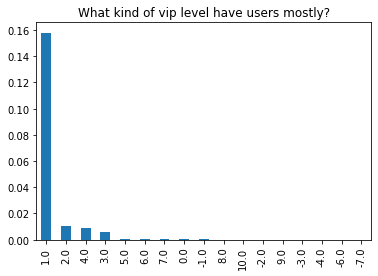

In [14]:
vip_levels = df['vip_level'].value_counts()

(vip_levels/df.shape[0]).plot(kind="bar");
plt.title("What kind of vip level have users mostly?");

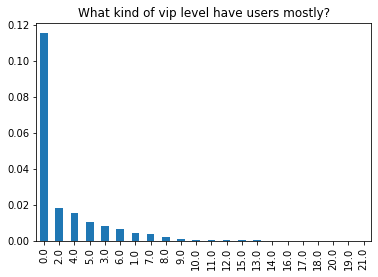

In [15]:
core_levels = df['core_level'].value_counts()

(core_levels/df.shape[0]).plot(kind="bar");
plt.title("What kind of vip level have users mostly?");

<AxesSubplot:>

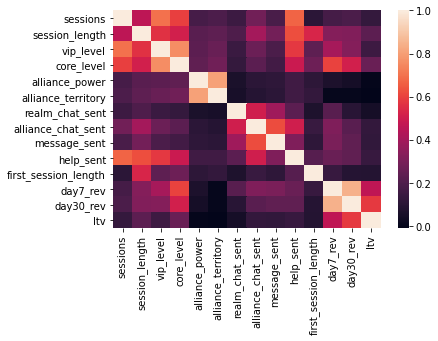

In [19]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [20]:
corr

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
sessions,1.000000,0.462079,0.696820,0.596918,0.178371,0.194613,0.151918,0.283819,0.184747,0.670853,0.107008,0.174979,0.191120,0.130137
session_length,0.462079,1.000000,0.564609,0.514611,0.226155,0.239161,0.198586,0.402452,0.290373,0.626687,0.533392,0.329017,0.318844,0.235058
vip_level,0.696820,0.564609,1.000000,0.761122,0.233500,0.261907,0.145848,0.270525,0.188361,0.581809,0.236214,0.406434,0.326071,0.153944
core_level,0.596918,0.514611,0.761122,1.000000,0.240010,0.280903,0.132226,0.231235,0.164745,0.492759,0.274564,0.602614,0.513149,0.263297
alliance_power,0.178371,0.226155,0.233500,0.240010,1.000000,0.807418,0.062801,0.105967,0.116923,0.163294,0.109441,0.067503,0.047056,0.001815
alliance_territory,0.194613,0.239161,0.261907,0.280903,0.807418,1.000000,0.057140,0.092342,0.105172,0.163495,0.125850,0.006130,0.003718,-0.009173
realm_chat_sent,0.151918,0.198586,0.145848,0.132226,0.062801,0.057140,1.000000,0.510650,0.390203,0.228366,0.072122,0.220268,0.099173,0.048367
alliance_chat_sent,0.283819,0.402452,0.270525,0.231235,0.105967,0.092342,0.510650,1.000000,0.625398,0.507552,0.142020,0.314153,0.224355,0.128599
message_sent,0.184747,0.290373,0.188361,0.164745,0.116923,0.105172,0.390203,0.625398,1.000000,0.317437,0.114102,0.302985,0.242454,0.124317
help_sent,0.670853,0.626687,0.581809,0.492759,0.163294,0.163495,0.228366,0.507552,0.317437,1.000000,0.216427,0.265551,0.241833,0.138385
